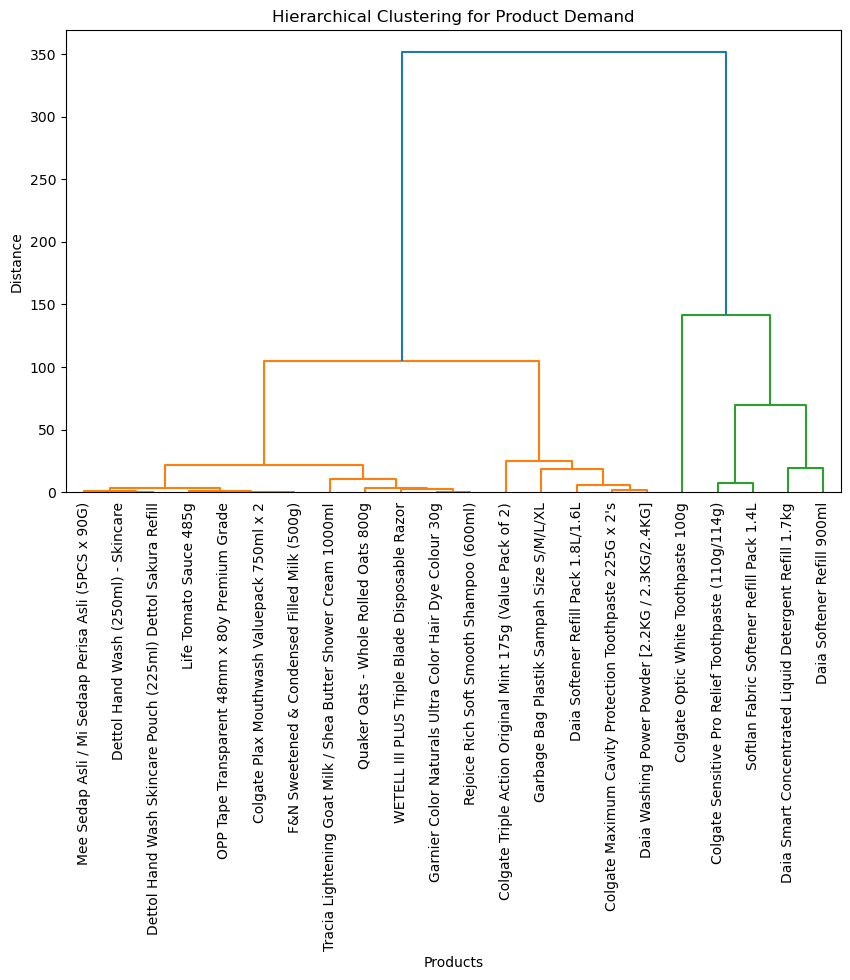

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data from the CSV file
file_path = '22_product_quantities_random_restock_limited_no_stock.csv'  # Replace with your file path
product_data = pd.read_csv(file_path)

# Calculate stock volume (sales quantity) and restock frequency for each product
sales_volumes = []
restock_frequencies = []

# Loop through each product to calculate sales volume and restock frequency
for _, row in product_data.iterrows():
    # Calculate daily changes in stock levels
    daily_changes = pd.to_numeric(row[1:].diff(), errors='coerce').fillna(0)
    
    # Sales volume: Sum of all decreases in stock levels (sales)
    sales_volume = -daily_changes[daily_changes < 0].sum()
    sales_volumes.append(sales_volume)
    
    # Restock frequency: Count of all increases in stock levels (restocks)
    restock_frequency = (daily_changes > 0).sum()
    restock_frequencies.append(restock_frequency)

# Add calculated features to the product data
product_data['Sales_Volume'] = sales_volumes
product_data['Restock_Frequency'] = restock_frequencies

# Prepare the data for clustering
X = product_data[['Sales_Volume', 'Restock_Frequency']].values

# Perform Hierarchical Clustering
Z = linkage(X, method='ward')  # 'ward' minimizes the variance within clusters

# Create a dendrogram to visualize the clusters
plt.figure(figsize=(10, 6))
dendrogram(Z, labels=product_data['Product'].values, leaf_rotation=90, leaf_font_size=10)
plt.title('Hierarchical Clustering for Product Demand')
plt.xlabel('Products')
plt.ylabel('Distance')
plt.show()
